#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [94]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)#np.random.seed(10)的作用：使得隨機數據可預測

# 資料準備

In [95]:
#取得Keras Dataset
# 匯入mnist模組用以下載並讀取mnist資料，利用mnist.load_data()下載資料
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [96]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 
'''
將x_img_train及x_img_test由原本三維轉為四維矩陣以符合CNN的需求，
這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4，
轉換後的shape為(ID, width, height, channel)
'''

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


'\n將x_img_train及x_img_test由原本三維轉為四維矩陣以符合CNN的需求，\n這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4，\n轉換後的shape為(ID, width, height, channel)\n'

In [97]:
#資料正規化
# 圖像數值原本是0到255，將數值除以255，可以使數值介於0到1，除了可提昇模型預測的準確度，梯度運算時也能更快收斂。
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [98]:
#針對Label 做 ONE HOT ENCODE
#彼此間不相關且非有序的categories轉換為連續性且是有序數值。
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

1.建立模型(Model)：首先，我們要確立Input格式、要經過幾層處理、每一層要作甚麼處理，例如以下程式：

參考來源:https://ithelp.ithome.com.tw/articles/10191725

In [99]:
# 建立多層感知器的模型，先匯入需要用到的模組
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [100]:
# 宣告採用序列模型
# 建立一個線性堆疊的模型
model = Sequential()

'''
說明:
依據官方文件 說明，Keras 提供兩種模型，
Sequential Model (順序式模型)與 Functional API。

1.Sequential Model (順序式模型)：
就是一種簡單的模型，單一輸入、單一輸出，
按順序一層(Dense)一層的由上往下執行。
2.Functional API：支援多個輸入、多個輸出。
'''

'\n說明:\n依據官方文件 說明，Keras 提供兩種模型，\nSequential Model (順序式模型)與 Functional API。\n\n1.Sequential Model (順序式模型)：\n就是一種簡單的模型，單一輸入、單一輸出，\n按順序一層(Dense)一層的由上往下執行。\n2.Functional API：支援多個輸入、多個輸出。\n'

## 卷積層1

In [101]:
#建構輸入層
#第一個卷積層並加入model
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
'''
參數說明:
filters: 該層有32個filters（即我們稱的filter或kernel）。
kernel_size: kernel大小為3 x 3 。
input_shape: 輸入的圖形維度為32 x 32 x 3 。
啟動函數: 'relu' 。
padding:'same' 代表保留邊界處的捲積結果，卷積後的圖形大小不變(即圖像周圍會補值)，通常會導致輸出shape與輸入shape相同。
padding:'valid' 代表只進行有效的捲積，對邊界數據不處理。
'''

"\n參數說明:\nfilters: 該層有32個filters（即我們稱的filter或kernel）。\nkernel_size: kernel大小為3 x 3 。\ninput_shape: 輸入的圖形維度為32 x 32 x 3 。\n啟動函數: 'relu' 。\npadding:'same' 代表保留邊界處的捲積結果，卷積後的圖形大小不變(即圖像周圍會補值)，通常會導致輸出shape與輸入shape相同。\npadding:'valid' 代表只進行有效的捲積，對邊界數據不處理。\n"

In [102]:
#加入Dropout層，Dropout它最大的功用是減少過度擬合。
'''
在深度學習的訓練過程中，
Dropout會讓每次batch run都依據機率丟棄一定比例的神經元不予計算，
使得每一次都好像在訓練不同的神經網路一樣。
'''
model.add(Dropout(rate=0.25)) #該Dropout層每次訓練時要丟棄25%的神經元。

In [103]:
#池化層
model.add(MaxPooling2D(pool_size=(2, 2)))
'''
參數說明:
pool size: 定義為(2,2)，即尺寸縮小為一半
本層接收了第一個卷積層的32個28×28影像後，會輸出32個14×14的影像。
'''

'\n參數說明:\npool size: 定義為(2,2)，即尺寸縮小為一半\n本層接收了第一個卷積層的32個28×28影像後，會輸出32個14×14的影像。\n'

## 卷積層2與池化層2

In [104]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
'''
參數說明:
filters: 該層有64個filters（即我們稱的filter或kernel）。
kernel_size: kernel大小為3 x 3 。
啟動函數: 'relu' 。
padding:'same' 代表保留邊界處的捲積結果，卷積後的圖形大小不變(即圖像周圍會補值)，通常會導致輸出shape與輸入shape相同。
padding:'valid' 代表只進行有效的捲積，對邊界數據不處理。
'''

"\n參數說明:\nfilters: 該層有64個filters（即我們稱的filter或kernel）。\nkernel_size: kernel大小為3 x 3 。\n啟動函數: 'relu' 。\npadding:'same' 代表保留邊界處的捲積結果，卷積後的圖形大小不變(即圖像周圍會補值)，通常會導致輸出shape與輸入shape相同。\npadding:'valid' 代表只進行有效的捲積，對邊界數據不處理。\n"

In [105]:
#加入Dropout層，Dropout它最大的功用是減少過度擬合。
model.add(Dropout(0.25)) #該Dropout層每次訓練時要丟棄25%的神經元。
'''
在深度學習的訓練過程中，
Dropout會讓每次batch run都依據機率丟棄一定比例的神經元不予計算，
使得每一次都好像在訓練不同的神經網路一樣。
'''

'\n在深度學習的訓練過程中，\nDropout會讓每次batch run都依據機率丟棄一定比例的神經元不予計算，\n使得每一次都好像在訓練不同的神經網路一樣。\n'

In [106]:
#池化層
model.add(MaxPooling2D(pool_size=(2, 2)))
'''
參數說明:
pool size: 定義為(2,2)，即尺寸縮小為一半
本層接收了第一個卷積層的32個28×28影像後，會輸出32個14×14的影像。
'''

'\n參數說明:\npool size: 定義為(2,2)，即尺寸縮小為一半\n本層接收了第一個卷積層的32個28×28影像後，會輸出32個14×14的影像。\n'

## 建立神經網路(平坦層、隱藏層、輸出層)

In [107]:
#建立平坦層，將特徵值轉為一維資料以供後續的全連結層使用
model.add(Flatten())
model.add(Dropout(rate=0.25)) #該Dropout層每次訓練時要丟棄25%的神經元。

In [108]:
#建立全網路連接層
#建立全連結層中的隱藏層(即傳統神經網路中的全連結層)，指定其神經元數目為1024個（此數目可調整），啟用函數使用Relu。
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))#該Dropout層每次訓練時要丟棄25%的神經元。

In [109]:
#建立輸出層
#也就是要要輸出十種0~9的分類值，一般我們都會使用softmax作為分類模型輸出層的啟動函數。
model.add(Dense(10, activation='softmax'))

In [110]:
#檢查model 的STACK
#使用summary指令review一下整個model吧
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [111]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

2.確立目標及求解方法：以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)。

參考來源:https://ithelp.ithome.com.tw/articles/10191725

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
'''
參數:
loss='categorical_crossentropy' : 設定損失函數，這邊使用cross entropy的效果比較好
optimizer='adam' :   使用adam為最優化方法
metrics=['accuracy'] 設定評估模型的方式是準確率
'''
#=========================================================================================
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [21]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, 
                        y_label_train_OneHot, 
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     
'''
參數:
epochs=12 : 設定跑12個訓練週期
batch_size=128 : 設定每一批次抓取128筆資料
verbose=2 : 設定顯示每一筆訓練過程
'''

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 28s 736us/step - loss: 1.3213 - accuracy: 0.5286 - val_loss: 1.4039 - val_accuracy: 0.5443
Epoch 2/12
37500/37500 [==============================] - 28s 751us/step - loss: 1.3008 - accuracy: 0.5366 - val_loss: 1.3879 - val_accuracy: 0.5459
Epoch 3/12
37500/37500 [==============================] - 28s 749us/step - loss: 1.2812 - accuracy: 0.5424 - val_loss: 1.3381 - val_accuracy: 0.5563
Epoch 4/12
37500/37500 [==============================] - 27s 722us/step - loss: 1.2666 - accuracy: 0.5487 - val_loss: 1.3158 - val_accuracy: 0.5736
Epoch 5/12
37500/37500 [==============================] - 29s 769us/step - loss: 1.2411 - accuracy: 0.5585 - val_loss: 1.3053 - val_accuracy: 0.5682
Epoch 6/12
37500/37500 [==============================] - 30s 812us/step - loss: 1.2252 - accuracy: 0.5629 - val_loss: 1.2861 - val_accuracy: 0.5789
Epoch 7/12
37500/37500 [==============================] 

'\n參數:\nepochs=12 : 設定跑12個訓練週期\nbatch_size=128 : 設定每一批次抓取128筆資料\nverbose=2 : 設定顯示每一筆訓練過程\n'

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#手動建立一個函數顯示訓練結果
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc]) # 畫出訓練資料的執行結果
    plt.plot(train_history.history[test_acc]) # 畫出驗證資料的執行結果
    plt.title('Train History') # 顯示圖的標題
    plt.ylabel('Accuracy') # 設定y軸標籤
    plt.xlabel('Epoch') # 設定x軸標籤
    plt.legend(['train_acc', 'val_acc'], loc='upper left') # 把圖例的位置放在左上角
    plt.show() # 把圖給畫出來

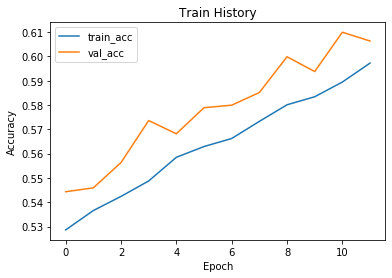

In [25]:
show_train_history('accuracy','val_accuracy')

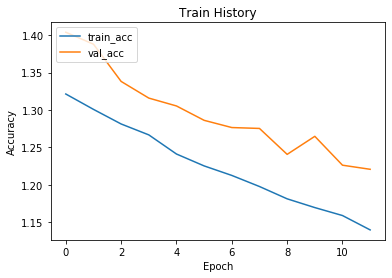

In [26]:
show_train_history('loss','val_loss')

In [69]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
                        epochs=12, batch_size=128, verbose=1)
'''
參數:
loss='categorical_crossentropy' : 設定損失函數，這邊使用cross entropy的效果比較好
optimizer='adam' :   使用adam為最優化方法
metrics=['accuracy'] 設定評估模型的方式是準確率
'''
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)
'''
參數:
epochs=12 : 設定跑12個訓練週期
batch_size=128 : 設定每一批次抓取128筆資料
verbose=2 : 設定顯示每一筆訓練過程
'''

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 28s 757us/step - loss: 0.0903 - accuracy: 0.1002 - val_loss: 0.0899 - val_accuracy: 0.1125
Epoch 2/12
37500/37500 [==============================] - 28s 757us/step - loss: 0.0901 - accuracy: 0.1080 - val_loss: 0.0898 - val_accuracy: 0.1273
Epoch 3/12
37500/37500 [==============================] - 29s 764us/step - loss: 0.0899 - accuracy: 0.1188 - val_loss: 0.0897 - val_accuracy: 0.1441
Epoch 4/12
37500/37500 [==============================] - 28s 738us/step - loss: 0.0898 - accuracy: 0.1236 - val_loss: 0.0896 - val_accuracy: 0.1512
Epoch 5/12
37500/37500 [==============================] - 27s 727us/step - loss: 0.0896 - accuracy: 0.1327 - val_loss: 0.0896 - val_accuracy: 0.1621
Epoch 6/12
37500/37500 [==============================] - 28s 760us/step - loss: 0.0895 - accuracy: 0.1358 - val_loss: 0.0895 - val_accuracy: 0.1715
Epoch 7/12
37500/37500 [==============================] 

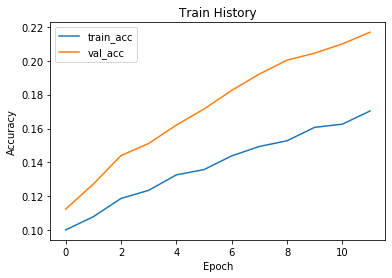

In [70]:
show_train_history('accuracy','val_accuracy')

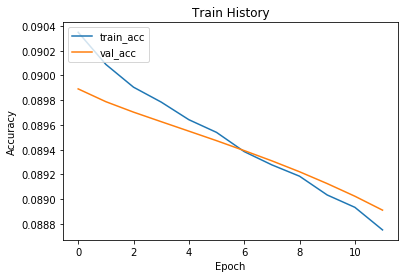

In [71]:
show_train_history('loss','val_loss')

In [113]:
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
                        
'''
參數:
loss='categorical_crossentropy' : 設定損失函數，這邊使用cross entropy的效果比較好
optimizer='adam' :   使用adam為最優化方法
metrics=['accuracy'] 設定評估模型的方式是準確率
'''
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)
'''
參數:
epochs=12 : 設定跑12個訓練週期
batch_size=128 : 設定每一批次抓取128筆資料
verbose=2 : 設定顯示每一筆訓練過程
'''

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 35s 927us/step - loss: 0.3254 - accuracy: 0.9000 - val_loss: 0.3224 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 34s 904us/step - loss: 0.3203 - accuracy: 0.9000 - val_loss: 0.3193 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 35s 921us/step - loss: 0.3152 - accuracy: 0.9000 - val_loss: 0.3151 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 34s 914us/step - loss: 0.3086 - accuracy: 0.9000 - val_loss: 0.3095 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 34s 919us/step - loss: 0.3023 - accuracy: 0.9000 - val_loss: 0.3041 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 35s 938us/step - loss: 0.2969 - accuracy: 0.9001 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] 

'\n參數:\nepochs=12 : 設定跑12個訓練週期\nbatch_size=128 : 設定每一批次抓取128筆資料\nverbose=2 : 設定顯示每一筆訓練過程\n'

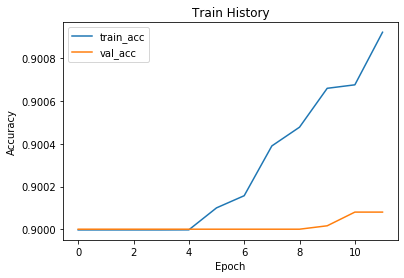

In [114]:
show_train_history('accuracy','val_accuracy')

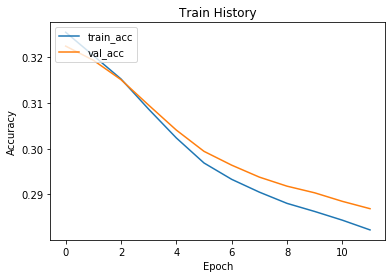

In [115]:
show_train_history('loss','val_loss')